# ARIMA

## Introdução

Neste notebook veremos sobre o ARIMA.  Talvez eu me aprofunde nisso mais tarde pois é um tópico grande e difícil, contudo vou por hora abordar de uma maneira resumida.

A grosso modo, o ARIMA é um modelo que recebe como entrada uma série temporal e devolve uma previsão da série em instantes futuros. Para isso, precisamos fornecer 3 parâmetros,

* p: ordem da parte autoregressiva,
* d: grau de diferenciação,
* q: ordem da média variável.

Em muitos casos é difícil saber qual conjunto (p,d,q) devemos escolher de tal modo que o erro seja mínimo. Assim, é possível usar o ```AUTO.arima()``` que testa várias combinações para encontrar a melhor combinação desses parâmetros. Como essa função pertence a outra biblioteca, isso será visto em outro notebook.

## Importando os dados iniciais

In [1]:
from pandas import read_csv
from datetime import datetime

def conversor(data):
    return datetime.strptime(data, '%Y-%m')

df = read_csv('AirPassengers.csv',index_col = 'Month',parse_dates = ['Month'],date_parser = conversor)

SerieTemporal = df['#Passengers']

Posto isso, chamamos a classe ```ARIMA``` da seguinte maneira

In [6]:
from statsmodels.tsa.arima.model import ARIMA

Dentre as variáveis possíveis, vamos destacar as seguintes:

* ```endog```: série temporal que será nossa entrada,
* ```order```: sequência de parâmetros (p,d,q),
* ```freq```: frequência da série temporal.

Deste modo,

In [7]:
modelo = ARIMA(endog = SerieTemporal, 
              order = (2,1,2),
              freq = SerieTemporal.index.inferred_freq)

/home/gabriel/Github/gabrielnrt/Aprendizado/notebooks/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Uma vez criada a instância, destacamos aqui o seguinte método:

*  ```fit```: ajuste (treinamento) de parâmetros do modelo,

que retorna uma instância de outra classe, chamada de ```ARIMAResults```. Essa nova instância, por sua vez, é dotada de outras variáveis, das quais destacamos

* ```summary```: resumo do modelo,
* ```forecast```: calcula os próximos passos da série

Visualizando o resumo:

In [9]:
modelo_treinado = modelo.fit()

modelo_treinado.summary()

/home/gabriel/Github/gabrielnrt/Aprendizado/notebooks/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Mon, 10 Jan 2022   AIC                           1353.347
Time:                        20:34:54   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.421      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.857      0.000      -2.086      -1.600
ma.L2          0.9953      0.134      7.404      0.000       0.732       1.259
sigma2       665.9677    113.831      5.851      0.000     442.864     889.071
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Calculando os próximos 12 passos,

In [24]:
previsoes = modelo_treinado.forecast(steps = 40)

previsoes

1961-01-01    439.854197
1961-02-01    465.295567
1961-03-01    500.665338
1961-04-01    535.971534
1961-05-01    561.690427
1961-06-01    571.315163
1961-07-01    562.975295
1961-08-01    539.732172
1961-09-01    508.530253
1961-10-01    478.147989
1961-11-01    456.746363
1961-12-01    449.694697
1962-01-01    458.247893
1962-02-01    479.393572
1962-03-01    506.857546
1962-04-01    532.944025
1962-05-01    550.676335
1962-06-01    555.646955
1962-07-01    547.090804
1962-08-01    527.927243
1962-09-01    503.806011
1962-10-01    481.459507
1962-11-01    466.837323
1962-12-01    463.536215
1963-01-01    471.935821
1963-02-01    489.241457
1963-03-01    510.381514
1963-04-01    529.478707
1963-05-01    541.472304
1963-06-01    543.446793
1963-07-01    535.321717
1963-08-01    519.745398
1963-09-01    501.257152
1963-10-01    484.977085
1963-11-01    475.198324
1963-12-01    474.265950
1964-01-01    482.032169
1964-02-01    496.008736
1964-03-01    512.144015
1964-04-01    525.986800


Caso queiramos ver apenas a primeira linha,

In [25]:
previsoes2 = modelo_treinado.forecast(steps = 40)[0]

previsoes2

439.854196996335

Com o conjunto de previsões em mãos, vamos realizar o gráfico e comparar com os dados de base.

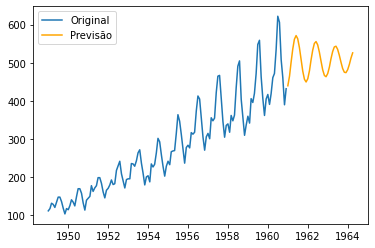

In [32]:
from pylab import plot, legend

plot(SerieTemporal, label = 'Original')
plot(previsoes, color = 'orange', label = 'Previsão')
legend()

Como podemos ver, a escolha de (p,d,q) não foi a ideal, mas podemos consertar isso com o autoARIMA, que é tema de outro notebook.